Import Statements

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

Get the past 10 years of stock price close data for Proctor & Gamble

In [2]:
ticker = 'EBAY' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

Estimate historical log returns

In [3]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,EBAY
Date,
2020-08-03,0.023068
2020-08-04,-0.004252
2020-08-05,0.005841
2020-08-06,-0.028282
2020-08-07,0.002357


Plot PG's price

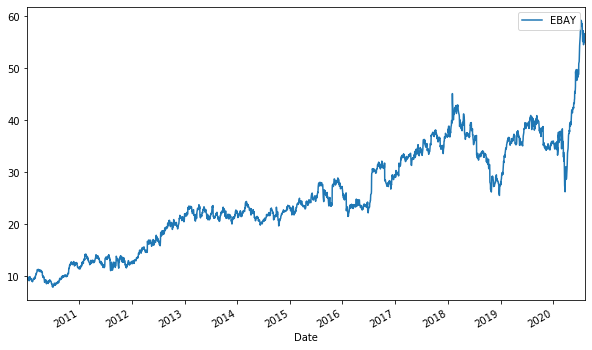

In [4]:
data.plot(figsize=(10, 6));

Plot log returns

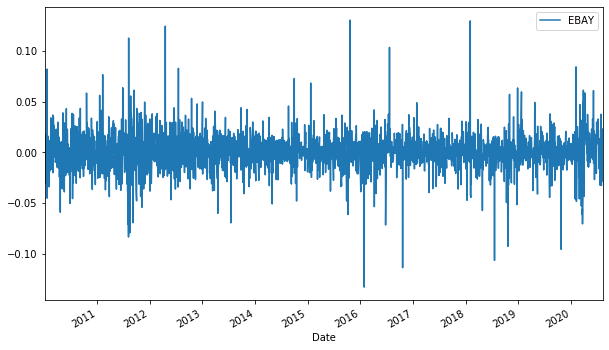

In [5]:
log_returns.plot(figsize = (10, 6))

find the mean

In [6]:
u = log_returns.mean()
u

EBAY    0.000647
dtype: float64

find the variance

In [7]:
var = log_returns.var()
var

EBAY    0.000334
dtype: float64

calculate the drift component for our geometric brownian motion model, mean - 1/2 variance

In [8]:
drift = u - (0.5 * var)
drift

EBAY    0.00048
dtype: float64

stddev of returns

In [9]:
stdev = log_returns.std()
stdev

EBAY    0.018282
dtype: float64

check that the types of our variables are pandas series

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

convert pandas to np arrays

In [12]:
np.array(drift)

array([0.00048001])

In [13]:
drift.values

array([0.00048001])

works with stddev too

In [14]:
stdev.values

array([0.0182819])

function to find standard deviation of percent chance, for instance 95% chance (lower tail probability) is 1.65 standard deviations above the mean

In [15]:
norm.ppf(0.95)

1.6448536269514722

10x2 array of random numbers

In [16]:
x = np.random.rand(10, 2)
x

array([[0.98406651, 0.47731961],
       [0.36634614, 0.36633343],
       [0.75439345, 0.16892552],
       [0.7431239 , 0.72085794],
       [0.49782621, 0.1169744 ],
       [0.49819041, 0.69365773],
       [0.83543376, 0.97468639],
       [0.13825899, 0.2696757 ],
       [0.13868196, 0.25899005],
       [0.93050781, 0.91036149]])

pass the random numbers into the ppf function

In [17]:
norm.ppf(x)

array([[ 2.14607514, -0.05688197],
       [-0.3415464 , -0.34158016],
       [ 0.68838066, -0.95841996],
       [ 0.65300634,  0.58539208],
       [-0.00544892, -1.19024832],
       [-0.00453598,  0.50624517],
       [ 0.97586275,  1.95462612],
       [-1.08817472, -0.61379409],
       [-1.08626013, -0.64646214],
       [ 1.47958367,  1.34298441]])

call this a random variable denoted $Z$

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.97404386,  1.60797904],
       [-0.87093121, -1.66308208],
       [-0.50927043, -2.9954166 ],
       [-1.04285979, -1.27558828],
       [-0.76605318, -0.26312516],
       [ 0.63854186,  1.15763748],
       [-0.09649723, -1.82523268],
       [-1.5344007 , -0.04725503],
       [-0.90325062,  1.11023705],
       [-0.0931925 ,  1.06444604]])

variables for the simulation

`t_intervals` is the number of days in the future

`iterations` is the number of times to simulate

In [19]:
t_intervals = 40
iterations = 100000

matrix of daily returns = $e^{\text{drift} + \text{stddev} \cdot Z}$

In [20]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.01475578, 0.98281823, 1.00077674, ..., 1.02597458, 0.99055104,
        1.01570246],
       [1.00565   , 1.03787425, 0.97778348, ..., 0.99189181, 1.02264538,
        0.98272999],
       [0.99930312, 1.02878442, 0.99353958, ..., 0.97871042, 0.98095325,
        0.99611871],
       ...,
       [0.99918108, 1.00150843, 0.9753977 , ..., 0.98905176, 1.02466726,
        0.97890968],
       [0.98139157, 0.981681  , 0.99532833, ..., 1.01308817, 1.04201648,
        1.01894099],
       [1.00389   , 0.98708893, 0.99686946, ..., 0.98871743, 0.97169344,
        0.99050082]])

Each row represents a day, each column represents a simulation. The values are the daily returns for that day and simulation. $S_{t+1} = S_{t-1} \cdot r$. We set $S_0$ equal to the current stock price.

In [21]:
S0 = data.iloc[-1]
S0

EBAY    55.209999
Name: 2020-08-07 00:00:00, dtype: float64

create a new array with the same dimentions as `daily returns`

In [22]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

set the first row (first day) of the simulation equal to the current price

In [23]:
price_list[0] = S0
price_list

array([[55.20999908, 55.20999908, 55.20999908, ..., 55.20999908,
        55.20999908, 55.20999908],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

simulate each day

In [24]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

did it work?

In [25]:
price_list

array([[55.20999908, 55.20999908, 55.20999908, ..., 55.20999908,
        55.20999908, 55.20999908],
       [55.52193538, 57.30103629, 53.98342486, ..., 54.76234583,
        56.46025032, 54.25652193],
       [55.48324315, 58.95041344, 53.63466913, ..., 53.59647847,
        55.38486609, 54.04593662],
       ...,
       [52.02750209, 67.0849037 , 53.21836601, ..., 63.17171818,
        55.05892072, 60.05615737],
       [51.05935204, 65.85597553, 52.96974753, ..., 63.99852005,
        57.37230263, 61.19368061],
       [51.25797279, 65.00570439, 52.80392356, ..., 63.27645249,
        55.74828991, 60.61239058]])

plot the iterations if there aren't too many

In [26]:
if iterations <= 10000:
    plt.figure(figsize=(10,6))
    plt.plot(price_list);

the final prices after 60 days for each iteration

In [27]:
final_prices = price_list[-1]

a histogram of the prices after 60 days

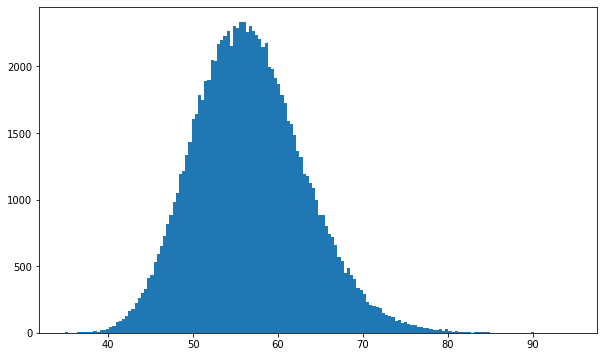

In [78]:
plt.figure(figsize=(10,6))
plt.hist(final_prices, bins='auto');

calculate the cumulative probability that the stock will be between two values

In [94]:
lb = -1
lb_inclusive = True
ub = 55
ub_inclusive = False

total_prices = 0
counted = 0
for price in final_prices:
    lb_condition = lb == -1 or price > lb
    ub_condition = ub == -1 or price < ub
    if lb_condition and ub_condition:
        counted += 1
    elif lb_inclusive and price == lb:
        counted += 1
    elif ub_inclusive and price == ub:
        counted += 1
    total_prices += 1

counted / total_prices

0.41936

class to represent a bundle of option contracts with a function to calculate the p/l at a given price

In [126]:
class OptionsStrategy:
    def __init__(self, contracts):
        self.contracts = contracts
        
    def reward(self, mkt):
        credit = -0.02

        for contract in self.contracts:
            if contract[0] == "LONG":
                credit -= contract[2]
                if contract[1] == "CALL" and mkt > contract[3]:
                    credit += mkt - contract[3]
                elif contract[1] == "PUT" and mkt < contract[3]:
                    credit += contract[3] - mkt
            elif contract[0] == "SHORT":
                credit += contract[2]
                if contract[1] == "CALL" and mkt > contract[3]:
                    credit -= mkt - contract[3]
                elif contract[1] == "PUT" and mkt < contract[3]:
                    credit -= contract[3] - mkt

        return credit

test a strategy

In [127]:
# ("LONG", "CALL", premium, strike)

trial_strategy = OptionsStrategy([
    ("SHORT", "PUT", 2.49, 55),
    ("LONG", "PUT", 0.74, 50)
])

plot the profit/loss diagram

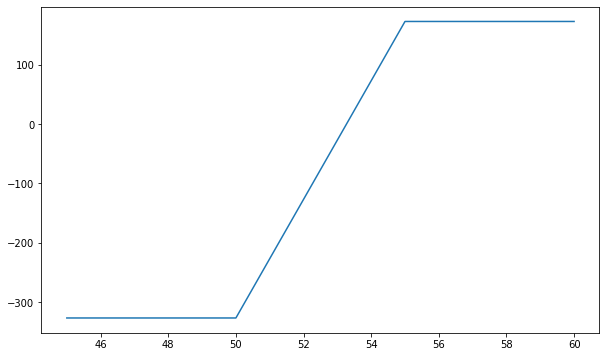

In [128]:
plt.figure(figsize=(10,6))
x = np.linspace(45, 60, 100)
plt.plot(x, [trial_strategy.reward(xi) * 100 for xi in x]);

calculate ev of the strategy

In [129]:
granularity = len(final_prices)

ev = 0
max_risk = 0
for price in final_prices:
    reward = trial_strategy.reward(price) * 100
    ev += reward / granularity
    if reward < max_risk:
        max_risk = reward
    
ev

34.543656488420375

capital risked

In [130]:
max_risk

-326.99999999999994

expected return on capital risked

In [131]:
-1 * ev / max_risk

0.10563809323675957